<a href="https://colab.research.google.com/github/muratko357/Uber-data-analysis/blob/main/Uber_data_anaylsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uber Data Analysis
The Data covers the number of Uber pickup in April 2014 in the New York city.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load Data and check the head of your data
uber_data = pd.read_csv('/content/drive/MyDrive/Uber data analysis/uber-data.csv')


In [4]:
uber_data.describe()

,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


In [5]:
#Look for the information about your data
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [6]:
# Transform date column to timestamp and the data type to string
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
### KULLANMIYORSAN SIL uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek.astype(str)
uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.day_name()
uber_data['DayOfMonth'] = uber_data['Date/Time'].dt.day.astype(str)
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour.astype(str)
# Other codes in case more data included:
# uber_data['Month'] = uber_data['Date/Time'].dt.month
# uber_data['Date/Time'] = (uber_data['Date/Time'].dt.month*100 + uber_data['Date/Time'].dt.day - 320)%1300
# uber_data['season'] = pd.cut(uber_data['Date/Time'], [0, 300, 602, 900, 1300], 
#                       labels=['spring', 'summer', 'autumn', 'winter'])

In [7]:
uber_data.sample(5)

,Date/Time,Lat,Lon,Base,DayOfWeek,DayOfMonth,HourOfDay
548477,2014-04-30 16:58:00,40.7206,-73.9478,B02682,Wednesday,30,16
39234,2014-04-01 23:16:00,40.7216,-73.9977,B02598,Tuesday,1,23
235566,2014-04-05 01:20:00,40.7185,-73.9893,B02617,Saturday,5,1
54470,2014-04-04 19:41:00,40.7480,-74.0009,B02598,Friday,4,19
252215,2014-04-09 20:50:00,40.7588,-73.9797,B02617,Wednesday,9,20


In [8]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date/Time   564516 non-null  datetime64[ns]
 1   Lat         564516 non-null  float64       
 2   Lon         564516 non-null  float64       
 3   Base        564516 non-null  object        
 4   DayOfWeek   564516 non-null  object        
 5   DayOfMonth  564516 non-null  object        
 6   HourOfDay   564516 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 30.1+ MB


In [9]:
# Check the data type
uber_data['HourOfDay'].map(type)

0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
564511    <class 'str'>
564512    <class 'str'>
564513    <class 'str'>
564514    <class 'str'>
564515    <class 'str'>
Name: HourOfDay, Length: 564516, dtype: object

#Analysis
Day of month and week

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


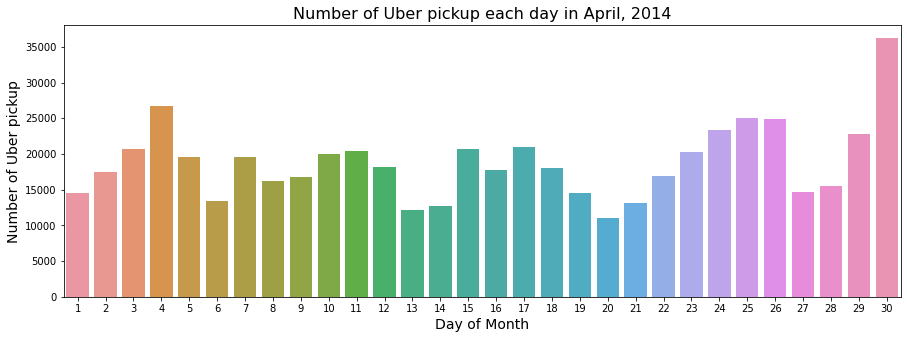

In [10]:
# Figure for day of month
plt.figure(figsize=(15,5))
sns.countplot(uber_data['DayOfMonth'])
plt.xlabel("Day of Month", fontsize=14)
plt.ylabel("Number of Uber pickup", fontsize=14)
plt.title("Number of Uber pickup each day in April, 2014", fontsize=16)
plt.show()

In [11]:
# Average mumbers of Uber pickup each day in a week - divide 4 for the month April
averagenum_pickup_DayOfWeek = uber_data.groupby(['DayOfWeek'])['Base'].count().sort_values(ascending=False)/4
averagenum_pickup_DayOfWeek

DayOfWeek
Wednesday    27157.75
Tuesday      22796.25
Friday       22575.75
Thursday     21266.75
Saturday     19304.50
Monday       15215.25
Sunday       12812.75
Name: Base, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


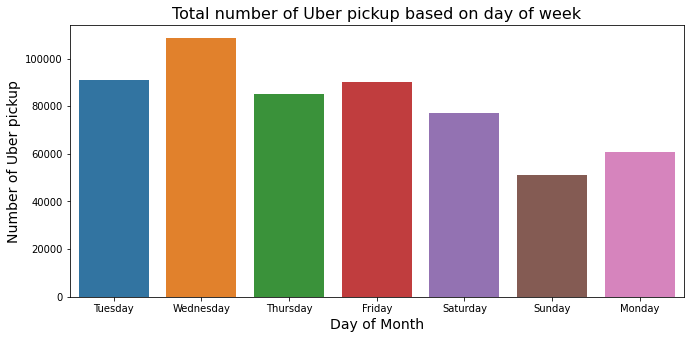

In [12]:
# Plot number of pickups vs day of the week
plt.figure(figsize=(11,5))
sns.countplot(uber_data['DayOfWeek'])
plt.xlabel("Day of Month", fontsize=14)
plt.ylabel("Number of Uber pickup", fontsize=14)
plt.title("Total number of Uber pickup based on day of week", fontsize=16)
plt.show()

## Analyze the hours

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


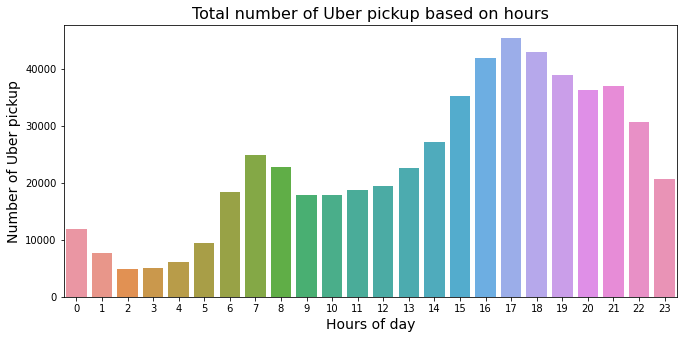

In [13]:
# Plot your hourly data to histogram
plt.figure(figsize=(11,5))
sns.countplot(uber_data["HourOfDay"])
plt.xlabel("Hours of day", fontsize=14)
plt.ylabel("Number of Uber pickup", fontsize=14)
plt.title("Total number of Uber pickup based on hours", fontsize=16)
plt.show()

## Cross Analysis

In [14]:
# Group your rows by two column and unstack it and set as new dataframe. Note unstack function takes second column name and set as columns of dataframe
# Hint: remember count_rows function

hrs_day_alternative = uber_data.groupby(['HourOfDay'])['DayOfWeek'].count().sort_values(ascending=False)
hrs_day_alternative


HourOfDay
17    45475
18    43003
16    42003
19    38923
21    36964
20    36244
15    35324
22    30645
14    27190
7     24924
8     22843
13    22603
23    20649
12    19425
11    18774
6     18498
9     17939
10    17865
0     11910
5      9476
1      7769
4      6095
3      5040
2      4935
Name: DayOfWeek, dtype: int64

In [15]:
# Crosstabulation of hour and day of week
hrs_day = pd.crosstab(uber_data.HourOfDay, uber_data.DayOfWeek)
hrs_day

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HourOfDay,,,,,,,
0,1367,518,3027,4542,792,765,899
1,760,261,2479,2936,459,367,507
10,2599,1953,2086,2113,2370,2900,3844
11,2816,1929,2315,2360,2516,2949,3889
12,2978,1945,2560,2478,2657,2819,3988
13,3535,2294,2685,2763,3301,3556,4469
14,4087,3117,3042,2934,4083,4489,5438
15,5354,3818,4457,3400,5182,6042,7071
16,6259,4962,5410,3489,6149,7521,8213


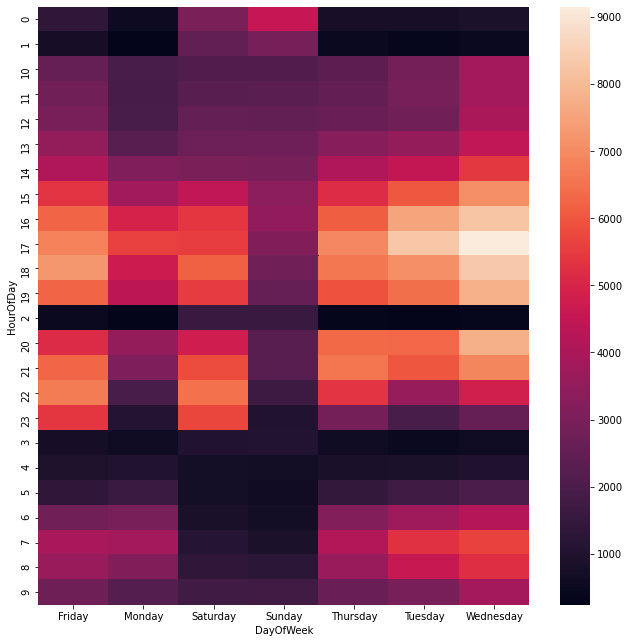

In [20]:
# Heatmap of the figues in previous table to show the most busy hours of the days
plt.figure(figsize=(11,11))
sns.heatmap(hrs_day)
plt.show()

## Analysis by Lon and Lat

Text(0, 0.5, 'Frequency')

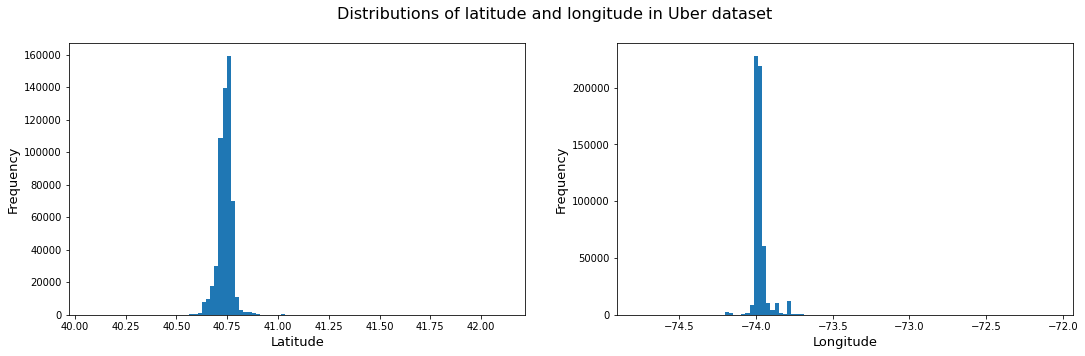

In [17]:
# Create a histogram with Lat and Lon, set bins to 100 because the default is 10
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle("Distributions of latitude and longitude in Uber dataset", fontsize=16)
ax1.hist(uber_data.Lat, bins= 100)
ax1.set_xlabel("Latitude", fontsize=13)
ax1.set_ylabel("Frequency", fontsize=13)

ax2.hist(uber_data.Lon, bins=100)
ax2.set_xlabel("Longitude", fontsize=13)
ax2.set_ylabel("Frequency", fontsize=13)

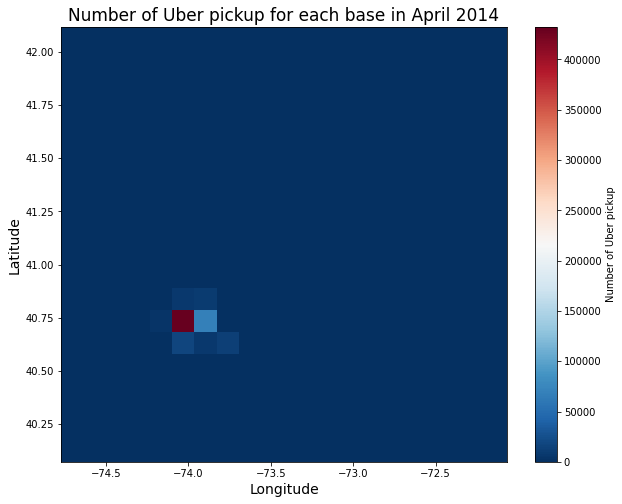

In [18]:
plt.figure(figsize = (10,8))
plt.hist2d(uber_data.Lon, uber_data.Lat, bins=20, cmap='RdBu_r')
plt.colorbar().set_label("Number of Uber pickup")
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Number of Uber pickup for each base in April 2014", fontsize=17)
plt.show()

# Conclusion
The analysis indicates that Uber pickup calls are mostly related to a close range of area in the New York city between 14:00 and 23:00 hours, except Sunday. Wednesday and Tuesday are the busiest days in this time frame with the highest number of pickup between 16:00 and 17:00 hrs.